In [12]:
# load libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep

# print working directory
os.getcwd()

%matplotlib inline

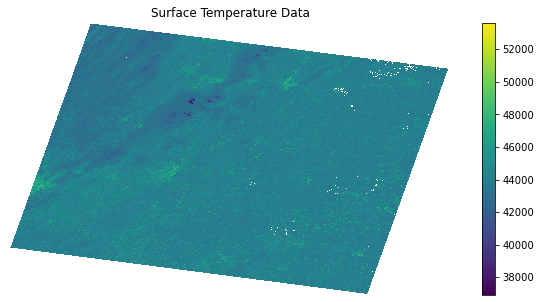

In [13]:
# open raster data
# landsat 8 c2 l2 surface temperature data
st_path = os.path.join(
        "bulk_orders",
        "Bulk Order Landsat 8 C2 L2",
        "Landsat 8 OLI_TIRS C2 L2",
        "LC08_L2SP_016034_20200906_20200918_02_T1",
        "LC08_L2SP_016034_20200906_20200918_02_T1_ST_B10.TIF",    
    )

# read in data
st_data = rxr.open_rasterio(st_path, masked=True).squeeze()

# plot data
f, ax = plt.subplots(figsize=(10,5))
st_data.plot.imshow()
ax.set(title="Surface Temperature Data")
ax.set_axis_off()
plt.show()

In [14]:
# open vector layer (shp file)

clip_path = os.path.join(
    'crs_espg_32617',
    'cville.shp',
)

cville = gpd.read_file(clip_path)
cville.head()

,FID_MASK,ID,SHAPE_area,SHAPE_len,geometry
0,-1,0,3.050647e+08,106729.765984,"POLYGON ((723898.648 4215268.292, 723919.906 4..."


In [15]:
# check crs of both data sources
print('cville crs', cville.crs)
print('st crs', st_data.rio.crs)

cville crs epsg:32617
st crs EPSG:32617


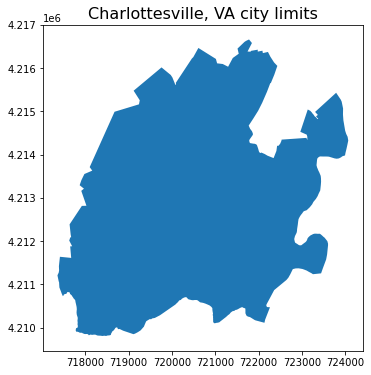

In [16]:
# plot the crop boundary layer
fig, ax = plt.subplots(figsize=(6,6))
cville.plot(ax=ax)
ax.set_title("Charlottesville, VA city limits", fontsize=16)
plt.show()

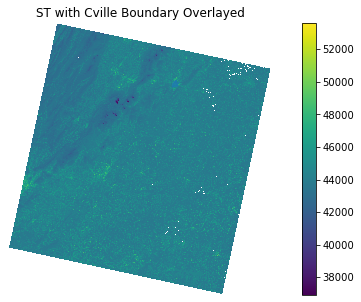

In [17]:
# plot raster and vector data overlayed
f, ax = plt.subplots(figsize=(10, 5))
st_data.plot.imshow(ax=ax)
cville.plot(ax=ax, alpha=0.8)
ax.set(title='ST with Cville Boundary Overlayed')
ax.set_axis_off()
plt.show()

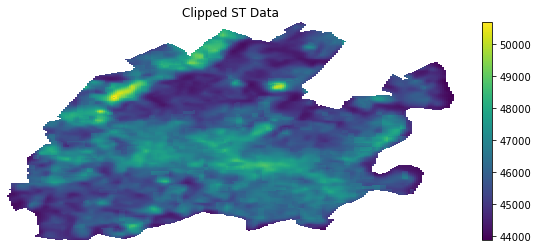

In [18]:
# clip raster using RioXarray .clip()
# raster data should be read using xarray or rioxarray
# vector data should be read using geopandas

# clip the data
st_clipped = st_data.rio.clip(cville.geometry.apply(mapping), cville.crs)

# plot clipped data
f, ax = plt.subplots(figsize=(10,4))
st_clipped.plot(ax=ax)
ax.set(title="Clipped ST Data")
ax.set_axis_off()
plt.show()

In [11]:
# export newly cropped raster
st_clipped.rio.to_raster(os.path.join("st_clipped", "st_cville.tif"))

In [2]:
# References
# [Crop Spatial Raster Data With a Shapefile in Python](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/)